In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
iris = load_iris()

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
class MLP:
  def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
    self.W1 = np.random.randn(input_size, hidden_size) * 0.01
    self.b1 = np.zeros((1, hidden_size))
    self.W2 = np.random.randn(hidden_size, output_size) * 0.01
    self.b2 = np.zeros((1, output_size))
    self.learning_rate = learning_rate

  def mlp_stats(self):
    print(f"W1: {self.W1}")
    print(f"b1: {self.b1}")
    print(f"W2: {self.W2}")
    print(f"b2: {self.b2}")

  def softmax(self, z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

  def relu(self, z):
    return np.maximum(0, z)

  def relu_derivative(self, z):
      return (z > 0).astype(float)

  def forward(self, X):
    # Layer 1
    self.z1 = np.dot(X, self.W1) + self.b1
    self.a1 = self.relu(self.z1)

    # Layer 2
    self.z2 = np.dot(self.a1, self.W2) + self.b2
    self.a2 = self.softmax(self.z2)

    return self.a2 # o/p probabilities

  def backward(self, X, y):
    m = y.shape[0]
    y_onehot = np.zeros_like(self.a2)
    y_onehot[np.arange(m), y] = 1

    # Layer 2
    dz2 = self.a2 - y_onehot
    dW2 = np.dot(self.a1.T, dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m
    self.W2 -= self.learning_rate * dW2
    self.b2 -= self.learning_rate * db2

    # Layer 1
    da1 = np.dot(dz2, self.W2.T)
    dz1 = da1 * self.relu_derivative(self.z1)
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m

    self.W1 -= self.learning_rate * dW1
    self.b1 -= self.learning_rate * db1

  def compute_loss(self, y, y_hat):

    ## SCCE
    # m = y.shape[0]
    # log_likelihood = -np.log(y_hat[range(m), y] + 1e-9)  # small epsilon for stability
    # return np.sum(log_likelihood) / m

    ## CCE
    m = y.shape[0] # Here, y is one hot encoded so we need to pass one hot encoded y
    log_likelihood = -np.sum(y * np.log(y_hat + 1e-9)) / m
    return log_likelihood


  def predict(self, X):
    y_hat = self.forward(X)
    return np.argmax(y_hat, axis=1)


  def train(self, X, y, epochs=1000):
    m = y.shape[0]
    y_onehot = np.zeros((m, self.b2.shape[1])) # create a zero array with the same shape as a2
    y_onehot[np.arange(m), y] = 1 # one-hot encode y

    for i in range(epochs):
        y_hat = self.forward(X)
        # loss = self.compute_loss(y, y_hat)
        loss = self.compute_loss(y_onehot, y_hat) # Pass one-hot encoded y
        self.backward(X, y)
        if i % 100 == 0:
            print(f"Epoch {i}, Loss: {loss:.4f}")

In [ ]:
X = iris.data
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y = pd.DataFrame(y)
y.value_counts()

,count
0,
0,50
1,50
2,50


In [ ]:
model = MLP(input_size=X_train.shape[1], hidden_size=10, output_size=3, learning_rate=0.01)
model.train(X_train, y_train, epochs=10000)

Epoch 0, Loss: 1.0988
Epoch 100, Loss: 1.0977
Epoch 200, Loss: 1.0954
Epoch 300, Loss: 1.0876
Epoch 400, Loss: 1.0608
Epoch 500, Loss: 0.9837
Epoch 600, Loss: 0.8479
Epoch 700, Loss: 0.7258
Epoch 800, Loss: 0.6373
Epoch 900, Loss: 0.5672
Epoch 1000, Loss: 0.5113
Epoch 1100, Loss: 0.4676
Epoch 1200, Loss: 0.4326
Epoch 1300, Loss: 0.4035
Epoch 1400, Loss: 0.3786
Epoch 1500, Loss: 0.3567
Epoch 1600, Loss: 0.3373
Epoch 1700, Loss: 0.3197
Epoch 1800, Loss: 0.3036
Epoch 1900, Loss: 0.2889
Epoch 2000, Loss: 0.2753
Epoch 2100, Loss: 0.2625
Epoch 2200, Loss: 0.2506
Epoch 2300, Loss: 0.2393
Epoch 2400, Loss: 0.2287
Epoch 2500, Loss: 0.2188
Epoch 2600, Loss: 0.2093
Epoch 2700, Loss: 0.2005
Epoch 2800, Loss: 0.1921
Epoch 2900, Loss: 0.1843
Epoch 3000, Loss: 0.1769
Epoch 3100, Loss: 0.1701
Epoch 3200, Loss: 0.1637
Epoch 3300, Loss: 0.1578
Epoch 3400, Loss: 0.1522
Epoch 3500, Loss: 0.1470
Epoch 3600, Loss: 0.1422
Epoch 3700, Loss: 0.1378
Epoch 3800, Loss: 0.1336
Epoch 3900, Loss: 0.1298
Epoch 4000, 

In [ ]:
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 1.0000


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


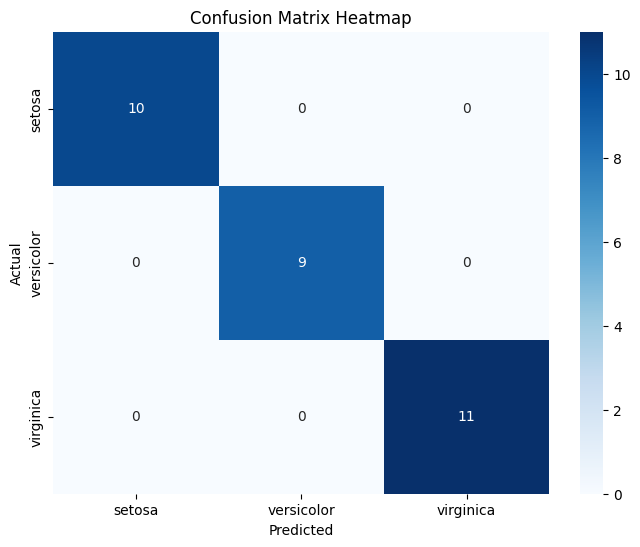

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()